### `Import Libraries`

In [6]:
import pandas as pd 
import numpy as np
import datetime
import matplotlib.patches as patches
import matplotlib.pyplot as plt 
import seaborn as sn
from io import StringIO 
from IPython.core.display import display, HTML
%matplotlib inline

### `Categorical Line Plot`

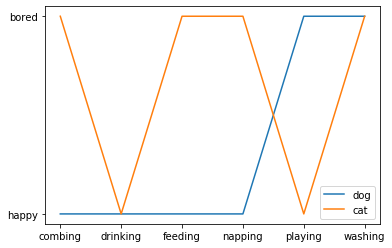

In [3]:

cat = ["bored", "happy", "bored", "bored", "happy", "bored"]
dog = ["happy", "happy", "happy", "happy", "bored", "bored"]
activity = ["combing", "drinking", "feeding", "napping", "playing", "washing"]

fig, ax = plt.subplots()
ax.plot(activity, dog, label="dog")
ax.plot(activity, cat, label="cat")
ax.legend()
plt.show()


### `Categorical Bar Plot`

In [9]:
# Sample Data
data = """ 
start,end,event,counts,categ
2016-10-02 16:58:00,2016-10-02 16:59:00,700,181,low
2016-10-03 16:58:00,2016-10-03 16:59:00,600,281,high
2016-10-04 16:58:00,2016-10-04 16:59:00,610,191,avg
2016-10-05 16:58:00,2016-10-05 16:59:00,920,244,high
"""

df = pd.read_table(StringIO(data), sep=",")
df.start = pd.to_datetime(df.start, format="%Y-%m-%d %H:%M:%S")
df["start_str_H_M"] = df.start.apply(lambda x : datetime.datetime.strftime(x, "%Y-%m-%d %H:%M"))
df.end = pd.to_datetime(df.end, format="%Y-%m-%d %H:%M:%S")
display(HTML(df.to_html()))

,start,end,event,counts,categ,start_str_H_M
0,2016-10-02 16:58:00,2016-10-02 16:59:00,700,181,low,2016-10-02 16:58
1,2016-10-03 16:58:00,2016-10-03 16:59:00,600,281,high,2016-10-03 16:58
2,2016-10-04 16:58:00,2016-10-04 16:59:00,610,191,avg,2016-10-04 16:58
3,2016-10-05 16:58:00,2016-10-05 16:59:00,920,244,high,2016-10-05 16:58


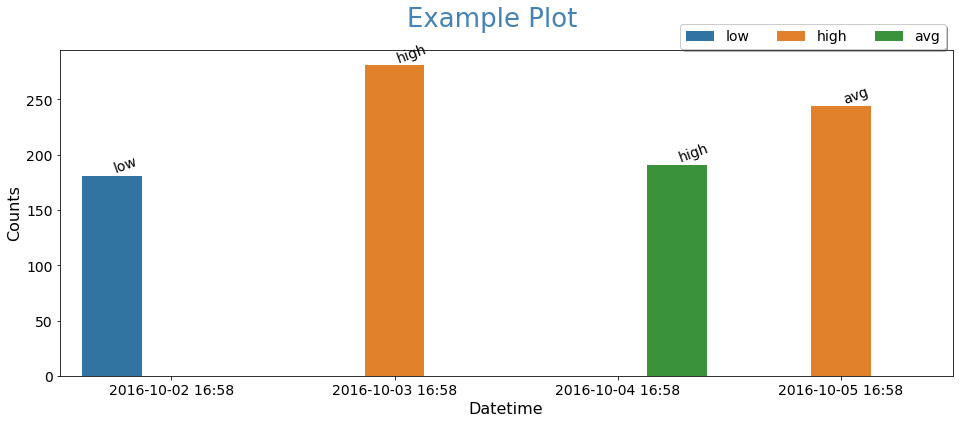

In [29]:
# Plot
fig, axes = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(16, 6))

labels_list = df["categ"].tolist()

ax = sn.barplot(x = "start_str_H_M", y = "counts", hue="categ", data=df)
bar_infos = ax.patches

i = 0
for bar_info in bar_infos:
    y_value = bar_info.get_height()
    if y_value > 1:
        label = labels_list[i]
        i += 1
    x_value = bar_info.get_x() + bar_info.get_width() / 2
    va = "bottom"
    space = 0.2
    # Annotation
    ax.annotate(
        label, # Label
        (x_value, y_value), # Label position 
        xytext=(0, space), # Vertical space given to label above bar
        textcoords="offset points",  
        ha="left",  # Horizontal alignment
        rotation=20, # Rotation angle
        size=14, # Annotate text size
        va=va # Vertical alignment
    )
# axes.set_ylim([0, 5])
# axes.set_ylabel([""])
# axes.set_yticklabels([])
# axes.set_yticks([])
axes.set_ylabel("Counts", fontsize=16)
axes.set_xlabel("Datetime", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
axes.legend(bbox_to_anchor=(1,1.1), fancybox=True, shadow=True, ncol=6, loc="upper right", prop={"size":14})
plt.suptitle("Example Plot", size=26, color="steelblue")
plt.subplots_adjust(top=.88, wspace=0.3)
plt.show()